<a href="https://colab.research.google.com/github/MarkusDarkus/Data_Analytics/blob/Test_tasks/Statistic_05_A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np

In [89]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Планирование эксперимента (дизайн)

Нужно понять сколько субъектов нам нужно для теста? \
Т.е сколько людей в день отправлять на тестирование \

1)Какой изначальный уровень конверсии? от чего отталкиваться пример: ----- 20%\
2)Какой минимальный эффект мы хотим задетектить? ----- 5%\
3)Статистическая мощность 1-b ------ 80 %\
4)Уровень значимости a ----- 5%  ошибка 1 рода(вероятность того что когда \ разницы нет , мы говорим, что разница есть)

In [90]:
mde = 0.05
baseline = 0.2
sample_size=1030

Можем проводить различные тесты:

* fisher exact test \
* Z test == Chi-square \
* T test \
* Chi square
* Bootstrap (Monte-Carlo)

Если данные нормально распределены, используются параметрические тесты.

## Z-test

In [91]:
a=np.random.binomial(1, baseline , size=sample_size)

In [92]:
b=np.random.binomial(1, baseline + mde, size=sample_size)

In [93]:
from statsmodels.stats.proportion import proportions_ztest

Ho: разницы между группами нет == пришли из одного **распределения**

In [94]:
proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])

(-3.015498779302195, 0.002565569716298417)

Делаем Бутстрап(Монте-Карло)

In [95]:
from tqdm.notebook import tqdm

In [96]:
res=[]
for _ in tqdm(range(10000)):
  a=np.random.binomial(1, baseline , size=sample_size)
  b=np.random.binomial(1, baseline , size=sample_size)
  _, pval= proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  res.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

<Axes: >

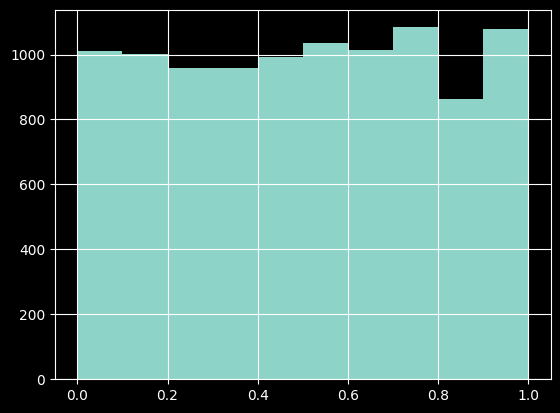

In [97]:
pd.Series(res).hist()

In [98]:
Z = pd.Series(res)
(Z < 0.05).mean() # получили мощность теста которую изначально и задавали (0ю8)

0.0508

<Axes: ylabel='Proportion'>

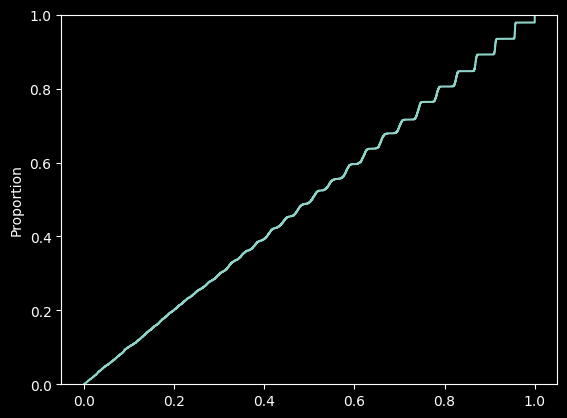

In [99]:
import seaborn as sns
sns.ecdfplot(Z)

## T - test

In [100]:
from scipy.stats import ttest_ind

In [85]:
res=[]
for _ in tqdm(range(10000)):
  a=np.random.binomial(1, baseline , size=sample_size)
  b=np.random.binomial(1, baseline, size=sample_size)
  _, pval= ttest_ind(a, b , equal_var=False)
  res.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [86]:
T = pd.Series(res)
(T < 0.05).mean()

0.0491

<Axes: ylabel='Proportion'>

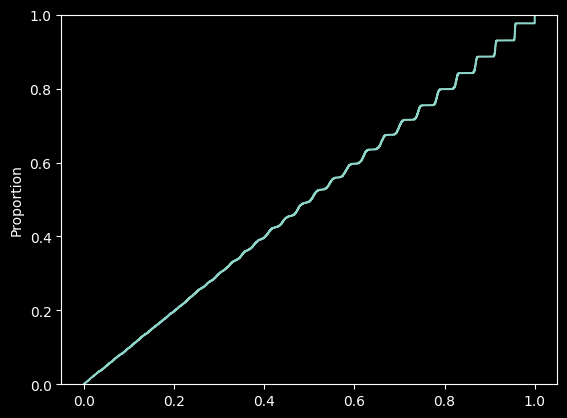

In [101]:
import seaborn as sns
sns.ecdfplot(T)

## Man-Whitney-U-test

Используется в непараметрических распределениях, но попробуем его применить и тут

In [102]:
from scipy.stats import mannwhitneyu

In [110]:
res=[]
for _ in tqdm(range(10000)):
  a=np.random.binomial(1, baseline , size=sample_size)
  b=np.random.binomial(1, baseline , size=sample_size)
  _, pval= mannwhitneyu(a, b,alternative='two-sided')
  res.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [111]:
U = pd.Series(res)
(U < 0.05).mean()

0.0486

<Axes: >

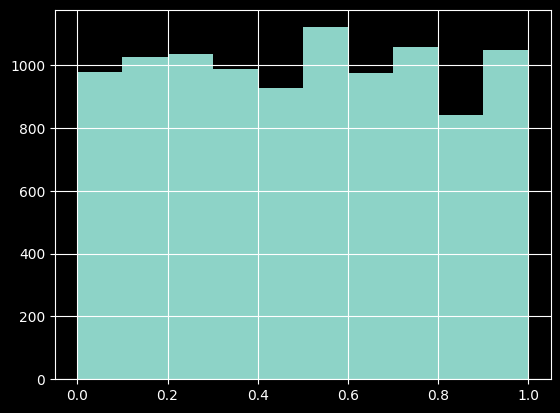

In [112]:
U.hist()

<Axes: ylabel='Proportion'>

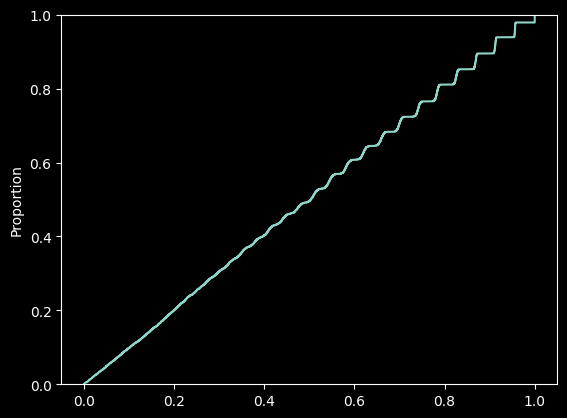

In [113]:
import seaborn as sns
sns.ecdfplot(U)

# Считаем размеры сэмплов для эксперимента

In [116]:
import statsmodels.stats.api as sms
es= sms.proportion_effectsize(0.20, 0.25)
sms.NormalIndPower().solve_power(es, power=0.80,alpha=0.05,ratio =1)

1091.8961587171943

In [119]:
res=[]
for _ in tqdm(range(10000)):
  a=np.random.binomial(1, baseline , size=1092)
  b=np.random.binomial(1, baseline +mde , size=1092)
  _, pval= proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  res.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [120]:
new_Z = pd.Series(res)
(new_Z < 0.05).mean()

0.8067

# Считаем размеры сэмплов для Монте-Карло

In [134]:
baseline = 0.3
mde = 0.02
sample_size=8393

In [135]:
res=[]
for _ in tqdm(range(10000)):
  a=np.random.binomial(1, baseline , size=sample_size)
  b=np.random.binomial(1, baseline +mde , size=sample_size)
  _, pval= proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  res.append(pval)
T = pd.Series(res)
(T<0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.7963

In [136]:
import statsmodels.stats.api as sms
es= sms.proportion_effectsize(0.30, 0.32)
sms.NormalIndPower().solve_power(es, power=0.80,alpha=0.05,ratio =1)

8392.38536140766